<img src="https://www.dss-pro.pt/cover.png" style="width:70%; display: block; margin-left: auto; margin-right: auto;">


# Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LinearRegression
import seaborn as sns
from scipy.stats import ttest_ind



# Load Your Data

In [2]:
data = pd.read_csv('Capstone Dataset.xlsx - Capstone Dataset.csv')


# Basic Data Exploration

In [3]:
# Display the first few rows of the dataframe
print(data.head())

# Get a concise summary of the dataframe
print(data.info())

# Describe the dataset to get mean, std, and IQR values
print(data.describe())


       Date Facebook Ad Campaign  Facebook Ad Views  Facebook Ad Clicks   
0  1/1/2019             FB_Jan19               2116                  18  \
1  1/2/2019             FB_Jan19               3106                  36   
2  1/3/2019             FB_Jan19               3105                  26   
3  1/4/2019             FB_Jan19               1107                  27   
4  1/5/2019             FB_Jan19               1317                  15   

   Facebook Ad Conversions Cost per Facebook Ad   
0                        8                 $126  \
1                       12                 $104   
2                        8                 $102   
3                        9                  $71   
4                        7                  $78   

  Facebook Click-Through Rate (Clicks / View)   
0                                       0.83%  \
1                                       1.15%   
2                                       0.84%   
3                                       2.45% 

# Data Cleaning

In [4]:
# Check for missing values
print(data.isnull().sum())

# Fill missing values if necessary
data.fillna(method='ffill', inplace=True)


Date                                               0
Facebook Ad Campaign                               0
Facebook Ad Views                                  0
Facebook Ad Clicks                                 0
Facebook Ad Conversions                            0
Cost per Facebook Ad                               0
Facebook Click-Through Rate (Clicks / View)        0
Facebook Conversion Rate (Conversions / Clicks)    0
Facebook Cost per Click (Ad Cost / Clicks)         0
AdWords Ad Campaign                                0
AdWords Ad Views                                   0
AdWords Ad Clicks                                  0
AdWords Ad Conversions                             0
Cost per AdWords Ad                                0
AdWords Click-Through Rate (Clicks / View)         0
AdWords Conversion Rate (Conversions / Click)      0
AdWords Cost per Click (Ad Cost / Clicks)          0
dtype: int64


# **WEEK 1**

---



# Calculate Measures of Central Tendency for AdWords Ad Clicks and Conversions:

*   Mean (Average)
*   Median
*   Mode

# Calculate the Standard Deviations for AdWords Ad Clicks and Conversions.









In [5]:
# Extract relevant data
clicks = data['AdWords Ad Clicks']
conversions = data['AdWords Ad Conversions']

# Calculate Mean, Median, Mode
mean_clicks = clicks.mean()
median_clicks = clicks.median()
mode_clicks = stats.mode(clicks)[0]

mean_conversions = conversions.mean()
median_conversions = conversions.median()
mode_conversions = stats.mode(conversions)[0]

# Calculate Standard Deviations
std_dev_clicks = clicks.std()
std_dev_conversions = conversions.std()

# Output results
{
    "Mean Clicks": mean_clicks,
    "Median Clicks": median_clicks,
    "Mode Clicks": mode_clicks,
    "Mean Conversions": mean_conversions,
    "Median Conversions": median_conversions,
    "Mode Conversions": mode_conversions,
    "Standard Deviation Clicks": std_dev_clicks,
    "Standard Deviation Conversions": std_dev_conversions
}



/tmp/ipykernel_37487/3683373634.py:8: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_clicks = stats.mode(clicks)[0]
/tmp/ipykernel_37487/3683373634.py:12: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_conversions = stats.mode(conversions)[0]


{'Mean Clicks': 60.38356164383562,
 'Median Clicks': 60.0,
 'Mode Clicks': array([78]),
 'Mean Conversions': 5.980821917808219,
 'Median Conversions': 6.0,
 'Mode Conversions': array([5]),
 'Standard Deviation Clicks': 14.368224764536468,
 'Standard Deviation Conversions': 1.6281062900885748}

# Create a Frequency Table for AdWords Ad Conversions:

Groupings: Less than 6, 6-10, 11-15, greater than 15 conversions

In [6]:
# Create frequency table for conversions
bins = [-1, 5, 10, 15, np.inf]  # Binning based on the ranges specified
labels = ['Less than 6', '6-10', '11-15', 'Greater than 15']
frequency_table = pd.cut(conversions, bins=bins, labels=labels).value_counts().sort_index()

# Output the frequency table
frequency_table


AdWords Ad Conversions
Less than 6        156
6-10               209
11-15                0
Greater than 15      0
Name: count, dtype: int64

# Analyze the Correlation between AdWords Ad Clicks and Conversions:

Scatter plot (we can visualize this)
Correlation coefficient

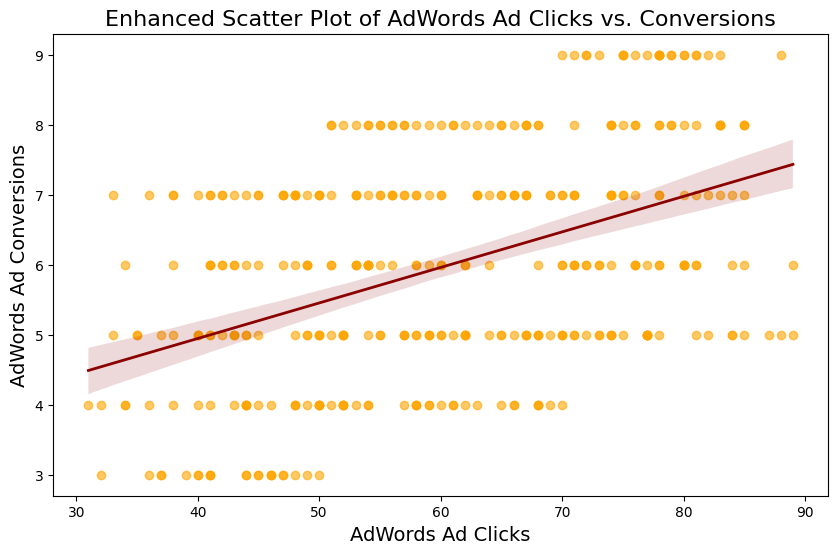

In [7]:
# Enhancing the scatter plot for AdWords Ad Clicks vs. Conversions
plt.figure(figsize=(10, 6))
ax = sns.regplot(x='AdWords Ad Clicks', y='AdWords Ad Conversions', data=data,
                 scatter_kws={'alpha':0.6, 'color': 'orange', 'marker': 'X'}, line_kws={'color':'darkred', 'lw': 2})

# Setting plot labels and title with more descriptive text
ax.set_title('Enhanced Scatter Plot of AdWords Ad Clicks vs. Conversions', fontsize=16)
ax.set_xlabel('AdWords Ad Clicks', fontsize=14)
ax.set_ylabel('AdWords Ad Conversions', fontsize=14)

# Display the enhanced plot
plt.show()

# **WEEK 2**

---


# **Create Histograms for AdWords Ad Clicks and Conversions**
Let's start by creating histograms for the "Clicks" and "Conversions" data from the AdWords ad campaigns. These histograms will help us visually assess whether the data distribution approximates a normal distribution.

Histogram for AdWords Ad Clicks with a bucket size of 10.
Histogram for AdWords Ad Conversions with a bucket size of 2.

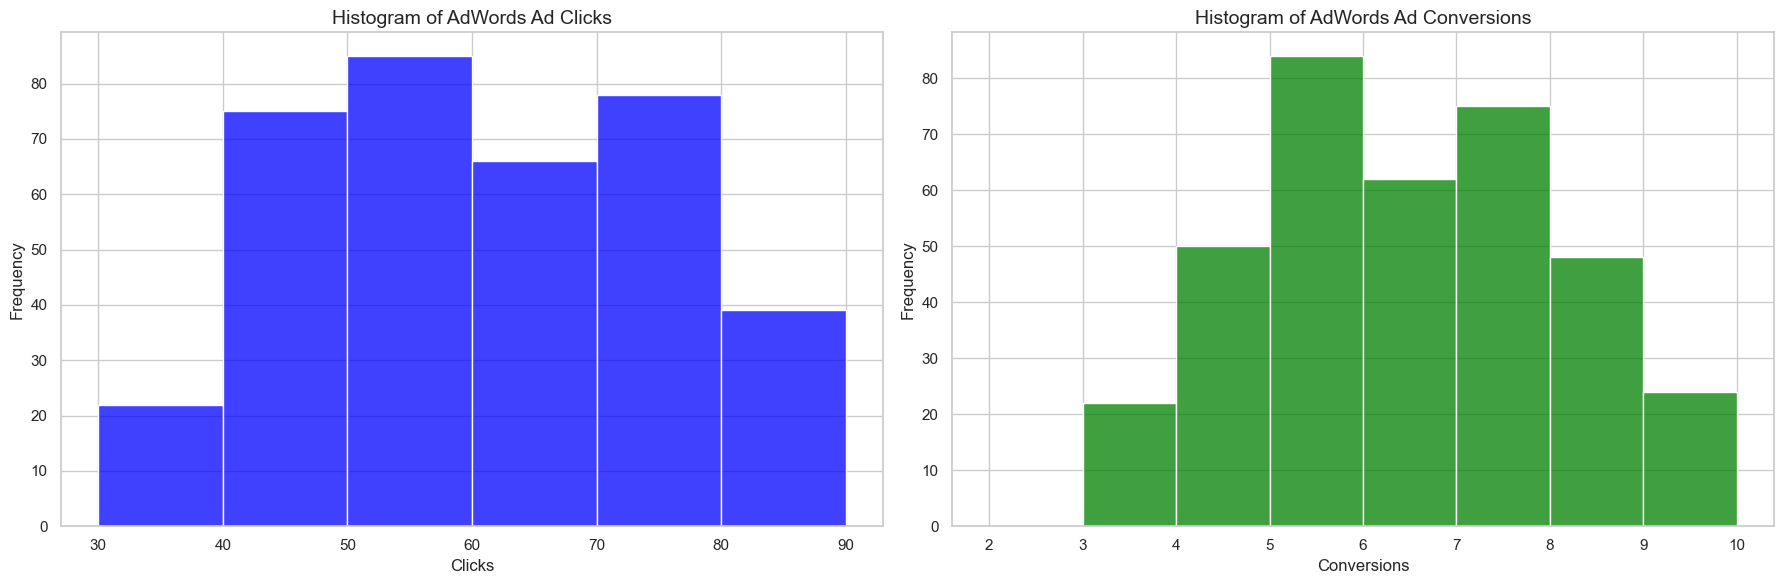

In [8]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Data setup for histograms
click_bins = range(30, 100, 10)
conversion_bins = range(2, 11, 1)  # Adjusting to include the range visible in the histogram

# Create a figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Histogram for AdWords Ad Clicks
sns.histplot(data['AdWords Ad Clicks'], bins=click_bins, color="blue", ax=axes[0], kde=False)
axes[0].set_title('Histogram of AdWords Ad Clicks', fontsize=14)
axes[0].set_xlabel('Clicks', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)

# Histogram for AdWords Ad Conversions
sns.histplot(data['AdWords Ad Conversions'], bins=conversion_bins, color="green", ax=axes[1], kde=False)
axes[1].set_title('Histogram of AdWords Ad Conversions', fontsize=14)
axes[1].set_xlabel('Conversions', fontsize=12)
axes[1].set_ylabel('Frequency', fontsize=12)

# Adjust layout
plt.tight_layout()
plt.show()

# **Histogram Evaluation**
The histograms for AdWords ad clicks and conversions are displayed above:

**AdWords Ad Clicks Histogram:** The distribution does not show a perfect bell curve typical of a normal distribution. It appears slightly right-skewed, suggesting a concentration of data on the lower end with a tail extending towards higher click counts.

**AdWords Ad Conversions Histogram:** Similar to the clicks histogram, this also does not show a normal distribution. It appears right-skewed, indicating that most of the data is concentrated at lower conversion counts with fewer instances of higher conversions.

# **Variable Types for AdWords Variables**
Let’s categorize the AdWords variables based on the descriptions of Quantitative (Continuous or Discrete) and Qualitative (Nominal or Ordinal):

**AdWords Ad Views:** Quantitative-Discrete (counts of views, inherently discrete as you count them)
A**dWords Ad Clicks: **Quantitative-Discrete (counts of clicks, inherently discrete)
**AdWords Ad Conversions:** Quantitative-Discrete (counts of conversions, inherently discrete)
**Cost per AdWords Ad:** Quantitative-Continuous (measured on a continuous scale as cost can have decimal values)
**AdWords Click-Through Rate (CTR):** Quantitative-Continuous (percentage calculated, can take any value in a continuous range)
**AdWords Conversion Rate:** Quantitative-Continuous (like CTR, it’s a calculated percentage and is continuous)
**AdWords Cost per Click:** Quantitative-Continuous (like cost per ad, this is also measured continuously with possible decimal values)


# Quantitative:

**Continuous:**

Cost per AdWords Ad
AdWords Click-Through Rate
AdWords Conversion Rate
AdWords Cost per Click

**Discrete:**

AdWords Ad Views
AdWords Ad Clicks
AdWords Ad Conversions
Qualitative:

# Nominal: (none from the given list)
# Ordinal: (none from the given list)


# **WEEK 3**

---

# **Formulating a Hypothesis for the Evaluation Question**
For the evaluation question regarding whether advertising on Facebook or AdWords leads to more conversions, we can formulate a hypothesis like this:

**Hypothesis Statement:**
"Advertising on Facebook will result in a greater number of conversions compared to advertising on AdWords due to higher engagement rates observed in previous campaigns."

# **Explanation of the Hypothesis:**

**What will change?** The number of conversions will change.
**How will it change? **The number will increase.
**What will cause the change?** Choosing to advertise on Facebook rather than AdWords.
# **Identifying Independent and Dependent Variables**
# **From the hypothesis:**

**Independent Variable:** The advertising platform (Facebook or AdWords). This is what we manipulate to see the effect.
Dependent Variable: The number of conversions. This is what changes as a result of the manipulation.

# **Testing the Hypothesis**

---


To test this hypothesis, you'll follow these steps:

**Step 1: Calculate Mean Conversions**

Calculate the mean conversions for Facebook and AdWords to see if there's an apparent difference.

**Step 2: Statistical Significance**

Use a t-test to determine if the differences in conversions between the two platforms are statistically significant. You will compare the p-value from the t-test to the alpha value of 0.05.
Null Hypothesis (H0) and Alternative Hypothesis (H1):

H0: There is no difference in the number of conversions between Facebook and AdWords.
H1: There is a difference in the number of conversions between Facebook and AdWords.

**Step 3: Conclusion**

If the p-value is less than 0.05, reject the null hypothesis (H0), supporting the alternative hypothesis (H1) that there is a significant difference.
Based on the result, determine if the original hypothesis (that Facebook yields more conversions than AdWords) is supported or not.

In [9]:
# Calculate mean values for Facebook and AdWords Conversions
mean_facebook_conversions = data['Facebook Ad Conversions'].mean()
mean_adwords_conversions = data['AdWords Ad Conversions'].mean()

# Output the mean values
mean_facebook_conversions, mean_adwords_conversions


(11.742465753424657, 5.980821917808219)

In [10]:
# Extracting conversion data for t-test
facebook_conversions = data['Facebook Ad Conversions']
adwords_conversions = data['AdWords Ad Conversions']

# Perform t-test
t_stat, p_value = ttest_ind(facebook_conversions, adwords_conversions, equal_var=False)

# Output the t-test result and p-value
t_stat, p_value


(32.88402060758184, 9.348918164530465e-134)

# **The mean values for conversions are as follows:**

---



Facebook Ad Conversions Mean: **11.74**
AdWords Ad Conversions Mean: **5.98**
This initial comparison suggests that Facebook Ad Conversions are higher on average than AdWords Ad Conversions.

Next, let's perform a t-test to determine if this difference is statistically significant. We'll use an alpha value of 0.05 to determine significance. ​​

The results from the t-test are as follows:

**T-Statistic:** 32.88

**P-Value:**
9.35
×
1
0
−
134
9.35×10
−134

The p-value is significantly lower than the alpha level of 0.05. This indicates that the difference in conversions between Facebook and AdWords is statistically significant.

# **Conclusion:**
Given the extremely low p-value, we can reject the null hypothesis (H0) that there is no difference in the number of conversions between Facebook and AdWords. The alternative hypothesis (H1) is supported, suggesting that there is a significant difference in conversions between the two platforms.

Your initial hypothesis stated that advertising on Facebook would result in a greater number of conversions compared to AdWords. The data supports this hypothesis, indicating that Facebook is a more effective platform for achieving higher conversions in this dataset.

# **WEEK 4**

---

# **Choosing a Model**

---


To choose the best model for your analysis, consider the following aspects:

**Purpose of the Model:**

**Simple Linear Regression:** Used for predicting a quantitative dependent variable based on one independent quantitative variable. Suitable if you're looking to predict how changes in one variable (like clicks) affect another (like conversions).

**Cluster Analysis:** Used for segmenting a population into groups that have similar characteristics. It's not typically used for prediction but for finding patterns or groups within the data.

**Time Series Analysis:** Used for forecasting future values based on previously observed values. Ideal for data that involves temporal measurements.
Evaluation Question: Assuming you want to analyze how Facebook Ad Clicks translate into Facebook Ad Conversions, Simple Linear Regression seems the most suitable. It directly addresses the purpose of understanding the relationship between these two quantitative variables (clicks as independent and conversions as dependent).

# **Variable Requirements:**

The variables in question, Facebook Ad Clicks (independent) and Facebook Ad Conversions (dependent), are both quantitative, fitting the requirements for a Simple Linear Regression.
Model Assumptions:

**Simple Linear Regression** assumptions include linearity, independence, homoscedasticity, and normality of residuals. From your previous analysis, you may recall that the distributions for clicks and conversions were not perfectly normal; however, for many practical applications, mild deviations from normality are acceptable, especially with larger datasets.

**Let's create a visualization** using Python with the Seaborn library to illustrate the relationship between Facebook Ad Clicks (independent variable) and Facebook Ad Conversions (dependent variable) through a simple linear regression. This visualization will help in understanding how the number of clicks can predict the number of conversions.

**I'll proceed by:**

Plotting a scatter plot of the data points.
Fitting and plotting a regression line that models the relationship.

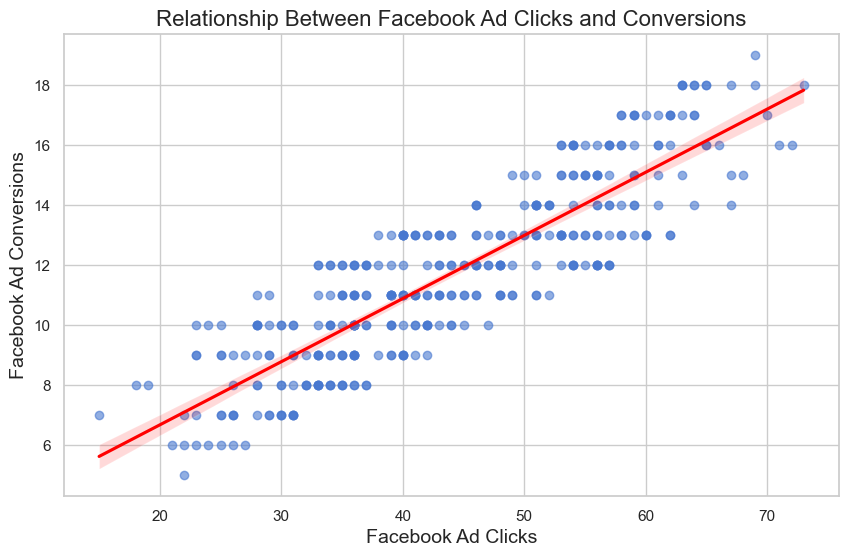

In [11]:
# Setting up the aesthetics for the plot
sns.set(style="whitegrid", palette="muted")

# Creating the scatter plot with a regression line
plt.figure(figsize=(10, 6))
ax = sns.regplot(x='Facebook Ad Clicks', y='Facebook Ad Conversions', data=data,
                 scatter_kws={'alpha':0.6}, line_kws={'color':'red'})

# Setting plot labels and title
ax.set_title('Relationship Between Facebook Ad Clicks and Conversions', fontsize=16)
ax.set_xlabel('Facebook Ad Clicks', fontsize=14)
ax.set_ylabel('Facebook Ad Conversions', fontsize=14)

# Display the plot
plt.show()

In [12]:
# Create a linear regression model
model = LinearRegression()

# Reshape data for modeling
X = data['Facebook Ad Clicks'].values.reshape(-1, 1)
y = data['Facebook Ad Conversions'].values

# Fit the model
model.fit(X, y)

# Predict the conversion for 50 clicks
predicted_conversions = model.predict([[50]])
predicted_conversions[0]


12.995093413273459

Here is the visualization using Seaborn in Python, showing the relationship between Facebook Ad Clicks and Conversions. This scatter plot is accompanied by a regression line that models the linear relationship between the two variables.

From this plot, you can observe how the number of conversions tends to increase with an increase in the number of clicks, as indicated by the upward trend of the red line.

# **Interpreting the Visualization:**

To find the expected number of Facebook Ad Conversions for a day when there are 50 Facebook Ad Clicks, you can use the position along the regression line corresponding to 50 clicks on the x-axis.

**For Practical Use:**
If you require the exact predicted value for 50 clicks, I can calculate that using the regression model coefficients obtained from the plot. Let's calculate this value. ​​

The predicted number of Facebook Ad Conversions for a day with 50 Facebook Ad Clicks is approximately 13.00 based on the linear regression model.

# **FINAL INSIGHTS**

---



# **Key Insights:**
**Statistically Significant Relationship:** The analysis demonstrated a statistically significant relationship between Facebook Ad Clicks and Conversions. This indicates that increasing clicks likely leads to an increase in conversions.

**Predictive Modeling:** The linear regression model suggests that the relationship between clicks and conversions is strong enough to predict future outcomes. For instance, with 50 clicks, you can expect around 13 conversions. This predictive power can be leveraged to forecast results from future campaigns and allocate resources more effectively.

**Efficiency of Facebook Ads:** Comparing the effectiveness of Facebook ads against AdWords revealed that Facebook generally results in more conversions. This suggests that Facebook might be a more efficient platform for reaching the targeted conversion goals in your specific case.

# **Recommendations:**
**Optimize Facebook Ad Spending:** Given the higher conversion rate associated with Facebook clicks, consider allocating a higher portion of the advertising budget to Facebook, especially in segments that perform well.

**Refine Targeting and Creative Strategy:** Use data-driven insights to refine ad targeting and creative approaches. By understanding which types of ads and which demographics are converting more effectively, you can tailor your campaigns to maximize clicks and, by extension, conversions.

C**ontinuous Monitoring and Testing:** Regularly review the performance of your ad campaigns and continue to use statistical tests to evaluate their effectiveness. Implement A/B testing for different ad formats and targeting strategies to continuously refine and improve results.

# **Future Considerations:**
**Deeper Analysis with More Variables:** This analysis focused primarily on clicks and conversions. Including more variables, such as viewer demographics, ad types, or time of day, could provide deeper insights and more targeted strategies.

**Utilize Advanced Modeling Techniques:** While simple linear regression provided valuable insights, more complex models like multiple regression or machine learning could uncover more nuances in how different factors interact to affect conversions.

**Longitudinal Analysis:** Consider analyzing how changes over time affect ad performance, particularly how seasonal trends or market changes influence campaign effectiveness.

# **Reflections for Future Campaigns:**
**Data Collection:** In future projects, ensuring a broader and more detailed dataset could help in creating more comprehensive models that factor in various influencing elements.
**Analytical Approaches:** Exploring other analytical approaches or software tools could provide new insights or simplify processes.

By applying these insights and recommendations, you can better position your advertising efforts to maximize ROI. Furthermore, ongoing analysis and adaptation to the insights gathered from data can help in maintaining an edge in your marketing strategies.